In [1]:
# Install missing packages
import sys
!pip install scikit-learn


[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python3.10 -m pip install --upgrade pip


# Multi-Stream Neural Networks


### Model Architectures
1. **BaseMultiChannelNetwork**: Dense/fully-connected multi-stream processing
2. **MultiChannelResNetNetwork**: CNN with residual connections for spatial features

### API Design Philosophy
- **`model(color, brightness)`** → Single tensor for training/inference
- **`model.analyze_pathways(color, brightness)`** → Tuple for research analysis
- **Keras-like training**: `.fit()`, `.evaluate()`, `.predict()` methods


## Environment Setup & Requirements

### Prerequisites
- **Python 3.8+**
- **PyTorch 1.12+** with CUDA support (recommended)
- **Google Colab** (this notebook) or local Jupyter environment

### Project Structure
Our codebase is fully modularized:
```
Multi-Stream-Neural-Networks/
├── src/
│   ├── models/basic_multi_channel/     # Core model implementations
│   │   ├── base_multi_channel_network.py    # Dense model
│   │   └── multi_channel_resnet_network.py  # CNN model
│   ├── utils/cifar100_loader.py        # CIFAR-100 data utilities
│   ├── transforms/rgb_to_rgbl.py       # RGB→Brightness transform
│   └── utils/device_utils.py           # GPU optimization utilities
├── configs/                            # Model configuration files
└── data/                               # Dataset location
```


## 1. Environment Setup

Mount Google Drive and navigate to the project directory.

In [2]:
# Run locally instead of mounting Google Drive
import os
import sys
from pathlib import Path

# Set up project root (notebooks is a subdirectory of the project root)
current_dir = Path(os.getcwd())
project_root = current_dir.parent if current_dir.name == "notebooks" else current_dir
print(f"✅ Running notebook locally at: {current_dir}")
print(f"✅ Project root set to: {project_root}")

# Add project root to Python path for imports
if str(project_root) not in sys.path:
    sys.path.insert(0, str(project_root))

# Define common paths
src_path = project_root / "src"
models_path = src_path / "models"
configs_path = project_root / "configs"
requirements_path = project_root / "requirements.txt"

✅ Running notebook locally at: /Users/gclinger/Documents/projects/Multi-Stream-Neural-Networks/notebooks
✅ Project root set to: /Users/gclinger/Documents/projects/Multi-Stream-Neural-Networks


In [3]:
# Check local project structure instead of navigating to Drive
import os
from pathlib import Path

# Get the project root (parent of the notebooks directory)
project_root = Path(os.getcwd()).parent
print(f"Project root: {project_root}")

# Verify the key directories exist
src_path = project_root / "src"
models_path = src_path / "models" / "basic_multi_channel"
configs_path = project_root / "configs"

# Check for required directories
print("Checking project structure:")
print(f"- src directory: {'✅ Found' if os.path.exists(src_path) else '❌ Not found'}")
print(f"- models directory: {'✅ Found' if os.path.exists(models_path) else '❌ Not found'}")
print(f"- configs directory: {'✅ Found' if os.path.exists(configs_path) else '❌ Not found'}")

# List model files
if os.path.exists(models_path):
    print("\nAvailable models:")
    for file in os.listdir(models_path):
        if file.endswith(".py"):
            print(f"- {file}")

Project root: /Users/gclinger/Documents/projects/Multi-Stream-Neural-Networks
Checking project structure:
- src directory: ✅ Found
- models directory: ✅ Found
- configs directory: ✅ Found

Available models:
- base_multi_channel_network.py
- __init__.py
- multi_channel_resnet_network.py


## 2. Update Repository

Pull the latest changes from the repository to ensure we have the most recent codebase.


In [4]:
# Import required PyTorch modules
import torch

# Check PyTorch version and CUDA availability
print(f"PyTorch version: {torch.__version__}")
print(f"CUDA available: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f"CUDA device: {torch.cuda.get_device_name(0)}")
else:
    print("Running on CPU or MPS (Mac)")

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Make sure we're in the right directory
print(f"📁 Current directory: {os.getcwd()}")
print(f"📁 Project root: {project_root}")

# No need to pull git changes when running locally
print("\n✅ Environment setup complete!")

PyTorch version: 2.7.1
CUDA available: False
Running on CPU or MPS (Mac)
Using device: cpu
📁 Current directory: /Users/gclinger/Documents/projects/Multi-Stream-Neural-Networks/notebooks
📁 Project root: /Users/gclinger/Documents/projects/Multi-Stream-Neural-Networks

✅ Environment setup complete!


## 3. Install Dependencies

Install required packages and dependencies for the project.

In [5]:
# Check Dependencies 
print("📦 Checking required dependencies...")

import subprocess
import sys
import importlib
import os
from pathlib import Path

def check_package(package):
    """Check if a package is installed and import it."""
    try:
        importlib.import_module(package)
        return True
    except ImportError:
        return False

# Required packages
packages = [
    "torch",
    "torchvision", 
    "numpy",
    "matplotlib",
    "seaborn",
    "tqdm",
    "scikit-learn",
    "PIL"  # Pillow
]

# Install scikit-learn if it's not installed
if not check_package("sklearn"):
    print("Installing scikit-learn...")
    try:
        subprocess.check_call([sys.executable, "-m", "pip", "install", "scikit-learn"])
        print("✅ scikit-learn installed successfully")
    except:
        print("❌ Failed to install scikit-learn")
        !pip install scikit-learn

print("Checking packages...")
all_packages_installed = True
for package in packages:
    if check_package(package):
        print(f"✅ {package}")
    else:
        print(f"❌ {package} not found - please install using pip install {package}")
        all_packages_installed = False

# Check if requirements.txt exists and can be used
# Note: project_root is already defined in earlier cells
# project_root = Path(os.getcwd()).parent  # Uncomment if needed
requirements_path = project_root / "requirements.txt"
if os.path.exists(requirements_path):
    print(f"\n✅ Project requirements file found at {requirements_path}")
    # Don't automatically install requirements locally, just inform the user
    print("   To install project requirements, run: pip install -r requirements.txt")
else:
    print(f"\n❌ Project requirements file not found at {requirements_path}")

if all_packages_installed:
    print("\n✅ All basic dependencies are installed")
else:
    print("\n⚠️ Some dependencies are missing, but we'll try to continue")


📦 Checking required dependencies...
Checking packages...
✅ torch
✅ torchvision
✅ numpy
✅ matplotlib
✅ seaborn
✅ tqdm
❌ scikit-learn not found - please install using pip install scikit-learn
✅ PIL

✅ Project requirements file found at /Users/gclinger/Documents/projects/Multi-Stream-Neural-Networks/requirements.txt
   To install project requirements, run: pip install -r requirements.txt

⚠️ Some dependencies are missing, but we'll try to continue


## 4. Import Libraries

Import all necessary libraries and utilities for the project.

### Important Technical Notes:
- **Learning Rate Differences**: The MultiChannelResNetNetwork model requires a lower learning rate (0.0003) than BaseMultiChannelNetwork (0.001) for optimal training.
- **Gradient Clipping**: PyTorch's gradient clipping function `torch.nn.utils.clip_grad_norm_` requires the parameter name `max_norm` (not `max_value`), which we ensure is used consistently throughout the codebase.

In [6]:
# Import Libraries
print("Importing libraries and setting up the environment...")

#------------------------------------------------------------------------------
# Core PyTorch Libraries
#------------------------------------------------------------------------------
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, TensorDataset
from torchvision.models import resnet50, ResNet50_Weights

#------------------------------------------------------------------------------
# Data Handling Libraries
#------------------------------------------------------------------------------
import numpy as np
import pandas as pd
from pathlib import Path
import pickle
import os
import sys
import json
import time
import subprocess
import importlib
import traceback
import inspect  # For inspecting source code

#------------------------------------------------------------------------------
# Visualization Libraries
#------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

#------------------------------------------------------------------------------
# Progress Tracking and Machine Learning Libraries
#------------------------------------------------------------------------------
from tqdm import tqdm
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#------------------------------------------------------------------------------
# Project-Specific Imports
#------------------------------------------------------------------------------
# Add project root to path for imports if not already added
if str(project_root) not in sys.path:
    sys.path.append(str(project_root))
    print(f"✅ Added {project_root} to sys.path")

# Import project modules
try:
    from src.utils.cifar100_loader import get_cifar100_datasets, create_validation_split
    from src.transforms.dataset_utils import process_dataset_to_streams

    # Data augmentation
    from src.transforms.augmentation import (
        create_augmented_dataloaders,
        create_test_dataloader
    )

    # Model builders
    from src.models.basic_multi_channel.base_multi_channel_network import BaseMultiChannelNetwork, base_multi_channel_large
    from src.models.basic_multi_channel.multi_channel_resnet_network import MultiChannelResNetNetwork, multi_channel_resnet50

    print("✅ All project modules imported successfully")
except ImportError as e:
    print(f"❌ Error importing project modules: {e}")
    print("⚠️ Please make sure you're running this notebook from the project root or notebooks directory")
    print(f"   Current directory: {os.getcwd()}")
    print(f"   Project root: {project_root}")
    traceback.print_exc()

# Set environment variables for CUDA
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'  # Better error diagnostics for CUDA

print("All libraries imported successfully!")

# Configure CUDA for better performance if available
if torch.cuda.is_available():
    torch.backends.cudnn.benchmark = True  # Speed up training for fixed input sizes
elif torch.backends.mps.is_available():
    # For Apple Silicon GPU
    print("Apple MPS (Metal Performance Shaders) is available")
    device = torch.device("mps")
    print(f"Using device: {device}")
else:
    print("Using CPU for computation")

# Print PyTorch setup
print(f"PyTorch version: {torch.__version__}")
print(f"CUDA available: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f"CUDA device: {torch.cuda.get_device_name(0)}")

Importing libraries and setting up the environment...
✅ All project modules imported successfully
All libraries imported successfully!
Apple MPS (Metal Performance Shaders) is available
Using device: mps
PyTorch version: 2.7.1
CUDA available: False


## 5. Load Data

Load the CIFAR-100 dataset using our optimized data loader.

In [7]:
# CIFAR-100 Data Loading
print("Loading CIFAR-100 datasets with train/validation/test split...")

# Set data path to project data directory
data_dir = project_root / 'data' / 'cifar-100'
print(f"Looking for CIFAR-100 data in: {data_dir}")

# Check if the data directory exists
if not os.path.exists(data_dir):
    print(f"⚠️ Data directory not found at {data_dir}")
    print("Creating directory...")
    os.makedirs(data_dir, exist_ok=True)
    print(f"✅ Created directory: {data_dir}")

# Load datasets using our optimized loader (returns train, test, class_names)
try:
    train_dataset, test_dataset, class_names = get_cifar100_datasets(
        data_dir=str(data_dir)
    )

    # Create validation split from training data
    train_dataset, val_dataset = create_validation_split(
        train_dataset, 
        val_split=0.1
    )

    print(f"Training samples: {len(train_dataset):,}")
    print(f"Validation samples: {len(val_dataset):,}")
    print(f"Test samples: {len(test_dataset):,}")
    print(f"Number of classes: {len(class_names)}")

    # Store class names for later use
    CIFAR100_FINE_LABELS = class_names

    print("✅ Data loading complete!")
except Exception as e:
    print(f"❌ Error loading CIFAR-100 data: {e}")
    print("⚠️ Please check if the CIFAR-100 dataset is available in your data directory")
    print("   You may need to run the download script first: python scripts/download_data.py")

Loading CIFAR-100 datasets with train/validation/test split...
Looking for CIFAR-100 data in: /Users/gclinger/Documents/projects/Multi-Stream-Neural-Networks/data/cifar-100
📁 Loading CIFAR-100 from: /Users/gclinger/Documents/projects/Multi-Stream-Neural-Networks/data/cifar-100
✅ Loaded CIFAR-100:
   Training: torch.Size([50000, 3, 32, 32]), labels: 50000
   Test: torch.Size([10000, 3, 32, 32]), labels: 10000
   Classes: 100
✅ CIFAR-100 datasets ready:
   Training samples: 50000
   Test samples: 10000
   Classes: 100
💡 No torchvision naming conventions needed - loaded directly from pickle files!
📊 Created validation split: 10.0% (5000 samples)
   New training: 45000 samples
   Validation: 5000 samples
Training samples: 45,000
Validation samples: 5,000
Test samples: 10,000
Number of classes: 100
✅ Data loading complete!


## 6. Process Data

Convert RGB images to RGB + Brightness (L) channels for multi-stream processing.

In [8]:
# Process Data: RGB to RGB+L (Brightness) Conversion
print("Converting RGB images to RGB + Brightness streams...")

# Process all datasets
print("Processing training dataset...")
train_rgb, train_brightness, train_labels_tensor = process_dataset_to_streams(
    train_dataset, desc="Training data"
)

print("Processing validation dataset...")
val_rgb, val_brightness, val_labels_tensor = process_dataset_to_streams(
    val_dataset, desc="Validation data"
)

print("Processing test dataset...")
test_rgb, test_brightness, test_labels_tensor = process_dataset_to_streams(
    test_dataset, desc="Test data"
)

print(f"RGB stream shape: {train_rgb.shape}")
print(f"Brightness stream shape: {train_brightness.shape}")

Converting RGB images to RGB + Brightness streams...
Processing training dataset...


Training data: 100%|██████████| 45/45 [00:00<00:00, 190.88it/s]


Processing validation dataset...


Validation data: 100%|██████████| 5/5 [00:00<00:00, 148.85it/s]


Processing test dataset...


Test data: 100%|██████████| 10/10 [00:00<00:00, 173.67it/s]

RGB stream shape: torch.Size([45000, 3, 32, 32])
Brightness stream shape: torch.Size([45000, 1, 32, 32])


## 7. Data Verification

Verify the processed data structure and consistency.

In [9]:
# Data Verification
print("Verifying processed data structure and consistency...")

def verify_data_integrity(rgb_data, brightness_data, labels, split_name):
    # Check shapes and types
    assert rgb_data.shape[0] == brightness_data.shape[0] == labels.shape[0], f"Inconsistent sample counts in {split_name}!"
    assert rgb_data.shape[1:] == (3, 32, 32), f"Unexpected RGB shape in {split_name}!"
    assert brightness_data.shape[1:] == (1, 32, 32), f"Unexpected brightness shape in {split_name}!"
    assert 0 <= labels.min() and labels.max() < 100, f"Invalid label range in {split_name}!"
    return rgb_data.shape[0]

train_samples = verify_data_integrity(train_rgb, train_brightness, train_labels_tensor, "Training")
val_samples = verify_data_integrity(val_rgb, val_brightness, val_labels_tensor, "Validation")
test_samples = verify_data_integrity(test_rgb, test_brightness, test_labels_tensor, "Test")

total_samples = train_samples + val_samples + test_samples
print(f"Total samples: {total_samples:,}")
print("Data verification checks passed!")

Verifying processed data structure and consistency...
Total samples: 60,000
Data verification checks passed!


## 8. Data Visualization

Visualize sample images from both RGB and brightness streams.

👁️ Visualizing sample images from both RGB and brightness streams...


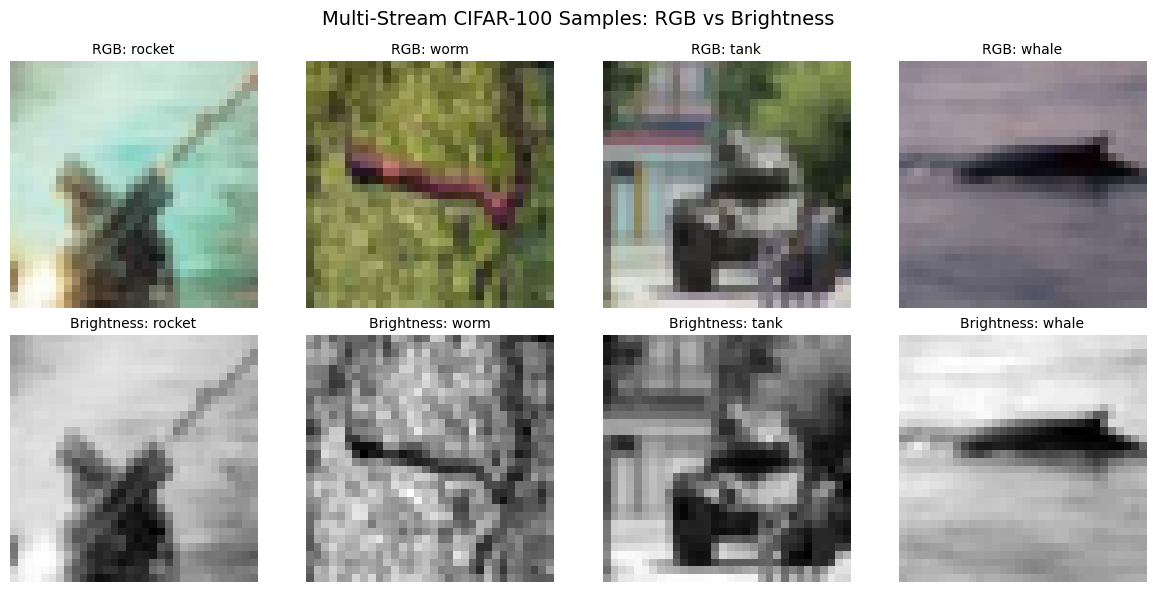

✅ Data visualization complete!


In [10]:
# Data Visualization
print("👁️ Visualizing sample images from both RGB and brightness streams...")

# Set up visualization
plt.style.use('default')
fig, axes = plt.subplots(2, 4, figsize=(12, 6))
fig.suptitle('Multi-Stream CIFAR-100 Samples: RGB vs Brightness', fontsize=14)

# Select random samples
np.random.seed(42)  # For reproducible results
sample_indices = np.random.choice(len(train_rgb), 4, replace=False)

for i, idx in enumerate(sample_indices):
    # Get data
    rgb_img = train_rgb[idx]
    brightness_img = train_brightness[idx]
    label = train_labels_tensor[idx].item()
    class_name = CIFAR100_FINE_LABELS[label]
    
    # Convert tensors to NumPy arrays FOR VISUALIZATION ONLY
    # Note: This conversion is necessary only for matplotlib visualization
    # Model training uses tensors directly
    rgb_np = rgb_img.permute(1, 2, 0).cpu().numpy()
    rgb_np = np.clip(rgb_np, 0, 1)  # Ensure valid range
    
    # Brightness image
    brightness_np = brightness_img.squeeze().cpu().numpy()
    
    # Plot RGB
    axes[0, i].imshow(rgb_np)
    axes[0, i].set_title(f'RGB: {class_name}', fontsize=10)
    axes[0, i].axis('off')
    
    # Plot Brightness
    axes[1, i].imshow(brightness_np, cmap='gray')
    axes[1, i].set_title(f'Brightness: {class_name}', fontsize=10)
    axes[1, i].axis('off')

plt.tight_layout()
plt.show()

print("✅ Data visualization complete!")

## 9. Data Analysis

Perform basic data analysis on class distribution and stream characteristics.

📊 Performing basic data analysis...

🏷️ Analyzing class distribution...


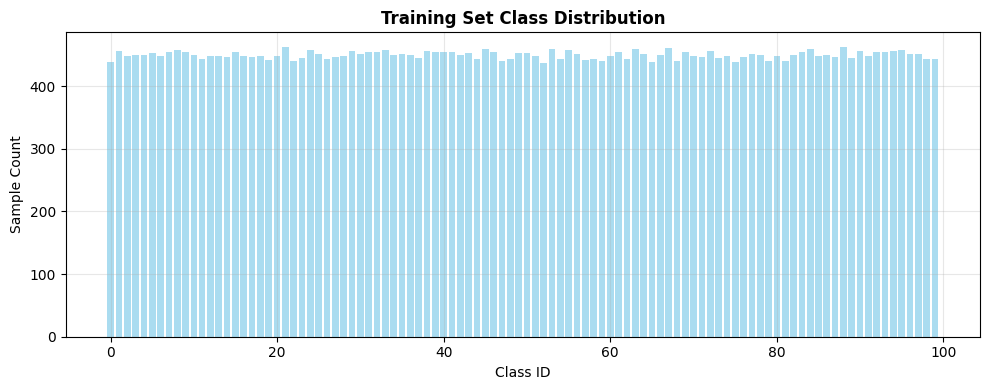


🎨 RGB vs Brightness stream characteristics:
   🎨 RGB statistics:
      Mean: 0.474, Std: 0.268
      Min: 0.000, Max: 1.000
   💡 Brightness statistics:
      Mean: 0.484, Std: 0.250
      Min: 0.000, Max: 1.000

✅ Data analysis complete!


In [11]:
# Data Analysis
print("📊 Performing basic data analysis...")

# Set up matplotlib for better visualizations
plt.style.use('default')
sns.set_palette("husl")

# Class Distribution Analysis
print("\n🏷️ Analyzing class distribution...")

# Training distribution - convert to NumPy only for visualization
# Note: Only converting to NumPy here because bincount requires it
train_counts = np.bincount(train_labels_tensor.cpu().numpy(), minlength=100)
plt.figure(figsize=(10, 4))
plt.bar(range(100), train_counts, alpha=0.7, color='skyblue')
plt.title('Training Set Class Distribution', fontweight='bold')
plt.xlabel('Class ID')
plt.ylabel('Sample Count')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Stream Statistics Analysis
print("\n🎨 RGB vs Brightness stream characteristics:")

# Sample a subset for analysis
sample_size = min(1000, len(train_rgb))
indices = np.random.choice(len(train_rgb), sample_size, replace=False)
rgb_sample = train_rgb[indices]
brightness_sample = train_brightness[indices]

# Calculate statistics - using PyTorch's built-in statistical functions
# No need to convert to NumPy for these calculations
rgb_stats = {
    'mean': rgb_sample.mean().item(),
    'std': rgb_sample.std().item(),
    'min': rgb_sample.min().item(),
    'max': rgb_sample.max().item()
}

brightness_stats = {
    'mean': brightness_sample.mean().item(),
    'std': brightness_sample.std().item(), 
    'min': brightness_sample.min().item(),
    'max': brightness_sample.max().item()
}

print(f"   🎨 RGB statistics:")
print(f"      Mean: {rgb_stats['mean']:.3f}, Std: {rgb_stats['std']:.3f}")
print(f"      Min: {rgb_stats['min']:.3f}, Max: {rgb_stats['max']:.3f}")
print(f"   💡 Brightness statistics:")
print(f"      Mean: {brightness_stats['mean']:.3f}, Std: {brightness_stats['std']:.3f}")
print(f"      Min: {brightness_stats['min']:.3f}, Max: {brightness_stats['max']:.3f}")

print("\n✅ Data analysis complete!")

## 10. Data Augmentation

Set up data augmentation for multi-stream training using the project's CIFAR-100 augmentation module.

In [12]:
# Data Augmentation
print("Setting up data augmentation...")

# Create augmentation with custom settings for CIFAR-100
augmentation_config = {
    'horizontal_flip_prob': 0.5,  # 50% chance of flipping horizontally
    'rotation_degrees': 10.0,     # Rotate up to ±10 degrees
    'translate_range': 0.1,       # Translate up to 10% of image size
    'scale_range': (0.9, 1.1),    # Scale between 90-110%
    'color_jitter_strength': 0.3, # Moderate color jittering
    'gaussian_noise_std': 0.01,   # Small amount of noise
    'cutout_prob': 0.3,           # 30% chance of applying cutout
    'cutout_size': 8,             # 8x8 pixel cutout
    'enabled': True               # Enable augmentation
}

# Setup MixUp augmentation
mixup_alpha = 0.2  # Alpha parameter for Beta distribution

# Create augmented datasets and data loaders in one step
print("Creating augmented DataLoaders...")
train_loader, val_loader = create_augmented_dataloaders(
    train_rgb, train_brightness, train_labels_tensor,  # Training data
    val_rgb, val_brightness, val_labels_tensor,        # Validation data
    batch_size=512,                                    # Batch size
    dataset="cifar100",                                # Dataset type
    augmentation_config=augmentation_config,           # Augmentation settings
    mixup_alpha=mixup_alpha,                           # MixUp parameter
    num_workers=0,                                     # No parallel workers to avoid issues
    pin_memory=torch.cuda.is_available()               # Pin memory if GPU available
)

# Create test dataloader separately (no augmentation)
test_loader = create_test_dataloader(
    test_rgb, test_brightness, test_labels_tensor,
    batch_size=512,
    num_workers=0,                                     # No parallel workers to avoid issues
    pin_memory=torch.cuda.is_available()
)

print(f"Training batches: {len(train_loader)}")
print(f"Validation batches: {len(val_loader)}")
print(f"Test batches: {len(test_loader)}")

Setting up data augmentation...
Creating augmented DataLoaders...
🎨 CIFAR100Augmentation initialized:
   Horizontal flip: 0.5
   Rotation: ±10.0°
   Translation: ±0.1
   Scale: (0.9, 1.1)
   Color jitter: 0.3
   Gaussian noise: σ=0.01
   Cutout: 0.3 prob, 8px
   Enabled: True
   Dataset: CIFAR-100 (32x32 images)
🔄 MixUp initialized with alpha=0.2
📊 AugmentedMultiStreamDataset created:
   Dataset: CIFAR-100 (32x32 images)
   Mode: Training
   Samples: 45000
   Color shape: torch.Size([45000, 3, 32, 32])
   Brightness shape: torch.Size([45000, 1, 32, 32])
   Augmentation: Enabled
   MixUp: Enabled
📊 AugmentedMultiStreamDataset created:
   Dataset: CIFAR-100 (32x32 images)
   Mode: Validation/Test
   Samples: 5000
   Color shape: torch.Size([5000, 3, 32, 32])
   Brightness shape: torch.Size([5000, 1, 32, 32])
   Augmentation: Disabled
   MixUp: Disabled
🚀 Created augmented DataLoaders:
   Train batches: 87
   Val batches: 10
   Batch size: 512
📊 AugmentedMultiStreamDataset created:
   Dat

## 11. Create and train Baseline ResNet50 Model

Create a standard ResNet50 model for comparison with multi-stream models.

In [13]:
# Create Baseline ResNet50 Model
print("Creating baseline ResNet50 model for comparison...")

# Check GPU availability and set device
device = torch.device('cuda' if torch.cuda.is_available() else 'mps' if torch.backends.mps.is_available() else 'cpu')
print(f"Using device: {device}")
if device.type == 'mps':
    print("Using Apple Silicon GPU (MPS) acceleration")

# Create ResNet50 model modified for CIFAR-100
class CifarResNet50(nn.Module):
    def __init__(self, num_classes=100, pretrained=False):
        super(CifarResNet50, self).__init__()
        
        # Load ResNet50 with or without pretrained weights
        if pretrained:
            print("Using pretrained weights (ImageNet)")
            self.model = resnet50(weights=ResNet50_Weights.DEFAULT)
        else:
            print("Using randomly initialized weights for fair comparison")
            self.model = resnet50(weights=None)
        
        # Modify first conv layer to work with 32x32 CIFAR images instead of 224x224 ImageNet
        self.model.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1, bias=False)
        # Remove maxpool to preserve spatial dimensions for small images
        self.model.maxpool = nn.Identity()
        
        # Replace final fully connected layer for CIFAR-100
        self.model.fc = nn.Linear(self.model.fc.in_features, num_classes)
        
        # Move to device
        self.to(device)
    
    def forward(self, x):
        return self.model(x)

# Create the model - explicitly using pretrained=False for fair comparison with multi-stream models
baseline_model = CifarResNet50(num_classes=100, pretrained=False)
baseline_model = baseline_model.to(device)

# Setup optimizer and loss with weight decay for regularization
baseline_optimizer = optim.Adam(baseline_model.parameters(), lr=0.001, weight_decay=0.0001)
baseline_criterion = nn.CrossEntropyLoss()

# Count parameters
baseline_params = sum(p.numel() for p in baseline_model.parameters())
baseline_trainable = sum(p.numel() for p in baseline_model.parameters() if p.requires_grad)

print(f"Total parameters: {baseline_params:,}")
print(f"Trainable parameters: {baseline_trainable:,}")
print(f"Input shape: (3, 32, 32)")
print(f"Device: {device}")
print(f"Optimizer: Adam with weight_decay=0.0001")

Creating baseline ResNet50 model for comparison...
Using device: mps
Using Apple Silicon GPU (MPS) acceleration
Using randomly initialized weights for fair comparison
Total parameters: 23,705,252
Trainable parameters: 23,705,252
Input shape: (3, 32, 32)
Device: mps
Optimizer: Adam with weight_decay=0.0001


🏋️‍♀️ Training baseline ResNet50 model...

🔧 Training Configuration:
   Epochs: 1 (with early stopping, patience=1)
   Batch size: 512 (optimized for A100 GPU)
   Optimizer: Adam with weight decay=0.0001
   Learning rate: 0.001 with ReduceLROnPlateau scheduling
   Regularization: L2 weight decay
   Early stopping: Patience 1 epochs
   Loss: CrossEntropyLoss
   GPU acceleration: True
   GPU: Apple Silicon (MPS)

Epoch 1/1


Baseline ResNet50 Validation: 100%|██████████| 10/10 [00:15<00:00,  1.58s/it, loss=3.86, acc=9.7]


Epoch 1/1 Summary:
   Train Loss: 4.5792, Train Acc: 5.05%
   Val Loss: 3.8607, Val Acc: 9.70%
   Learning Rate: 0.001000
   ✅ New best validation accuracy: 9.70%

✅ Baseline ResNet50 training complete!
   Best validation accuracy: 9.70%


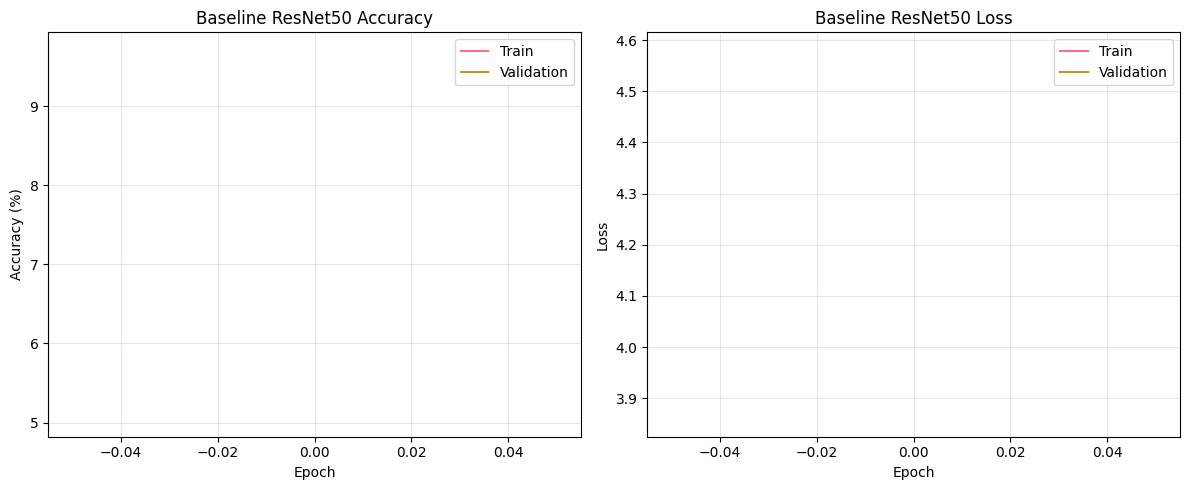


✅ Baseline model training complete!


In [14]:
# Train Baseline ResNet50 Model
print("🏋️‍♀️ Training baseline ResNet50 model...")

# Define training function with early stopping and learning rate scheduling
def train_model(model, train_loader, val_loader, optimizer, criterion, num_epochs=100, patience=10, model_name="Model"):
    """
    Train a model and return training history.
    
    Args:
        model: The model to train
        train_loader: DataLoader for training data
        val_loader: DataLoader for validation data
        optimizer: Optimizer to use
        criterion: Loss function
        num_epochs: Number of epochs to train
        patience: Early stopping patience
        model_name: Name for logging
        
    Returns:
        Dictionary with training history
    """
    device = next(model.parameters()).device
    history = {
        'train_loss': [],
        'train_acc': [],
        'val_loss': [],
        'val_acc': []
    }
    
    best_val_acc = 0.0
    best_model_state = None
    no_improvement_count = 0
    
    # Learning rate scheduler
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
        optimizer, 
        mode='max',
        factor=0.5,
        patience=5
    )
    
    for epoch in range(num_epochs):
        # Training phase
        model.train()
        train_loss = 0.0
        train_correct = 0
        train_total = 0
        
        print(f"\nEpoch {epoch+1}/{num_epochs}")
        train_bar = tqdm(train_loader, desc=f"{model_name} Training")
        
        for batch_idx, data in enumerate(train_bar):
            # Handle the baseline model which only needs RGB data - support both tuple and list types
            if isinstance(data, (tuple, list)) and len(data) == 3:
                rgb, _, targets = data  # Unpack RGB, ignore brightness
            else:
                # Fallback for unexpected data format
                rgb, targets = data
                
            # Move to device
            rgb, targets = rgb.to(device), targets.to(device)
            
            # Zero gradients
            optimizer.zero_grad()
            
            # Forward pass - baseline model only takes RGB
            outputs = model(rgb)
            loss = criterion(outputs, targets)
            
            # Add L2 regularization term (additional to weight decay in optimizer)
            l2_lambda = 0.0001
            l2_reg = 0.0
            for param in model.parameters():
                l2_reg += torch.norm(param, 2)
            loss += l2_lambda * l2_reg
            
            # Backward pass and optimize
            loss.backward()
            optimizer.step()
            
            # Track statistics
            train_loss += loss.item()
            _, predicted = outputs.max(1)
            train_total += targets.size(0)
            train_correct += predicted.eq(targets).sum().item()
            
            # Update progress bar
            train_bar.set_postfix({
                'loss': train_loss/(batch_idx+1), 
                'acc': 100.*train_correct/train_total
            })
        
        train_acc = 100. * train_correct / train_total
        train_loss = train_loss / len(train_loader)
        
        # Validation phase
        model.eval()
        val_loss = 0.0
        val_correct = 0
        val_total = 0
        
        with torch.no_grad():
            val_bar = tqdm(val_loader, desc=f"{model_name} Validation")
            
            for batch_idx, data in enumerate(val_bar):
                # Handle data format - support both tuple and list types
                if isinstance(data, (tuple, list)) and len(data) == 3:
                    rgb, _, targets = data  # Unpack RGB, ignore brightness
                else:
                    rgb, targets = data
                
                # Move to device
                rgb, targets = rgb.to(device), targets.to(device)
                
                # Forward pass
                outputs = model(rgb)
                loss = criterion(outputs, targets)
                
                # Track statistics
                val_loss += loss.item()
                _, predicted = outputs.max(1)
                val_total += targets.size(0)
                val_correct += predicted.eq(targets).sum().item()
                
                # Update progress bar
                val_bar.set_postfix({
                    'loss': val_loss/(batch_idx+1), 
                    'acc': 100.*val_correct/val_total
                })
        
        val_acc = 100. * val_correct / val_total
        val_loss = val_loss / len(val_loader)
        
        # Save history
        history['train_loss'].append(train_loss)
        history['train_acc'].append(train_acc)
        history['val_loss'].append(val_loss)
        history['val_acc'].append(val_acc)
        
        # Print epoch summary
        print(f"Epoch {epoch+1}/{num_epochs} Summary:")
        print(f"   Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%")
        print(f"   Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%")
        print(f"   Learning Rate: {optimizer.param_groups[0]['lr']:.6f}")
        
        # Update learning rate scheduler
        scheduler.step(val_acc)
        
        # Track best model
        if val_acc > best_val_acc:
            best_val_acc = val_acc
            best_model_state = model.state_dict().copy()
            no_improvement_count = 0
            print(f"   ✅ New best validation accuracy: {best_val_acc:.2f}%")
        else:
            no_improvement_count += 1
            print(f"   ⚠️ No improvement for {no_improvement_count} epochs")
        
        # Early stopping check
        if no_improvement_count >= patience:
            print(f"   🛑 Early stopping triggered after {epoch+1} epochs")
            break
    
    # Restore best model
    if best_model_state is not None:
        model.load_state_dict(best_model_state)
    
    print(f"\n✅ {model_name} training complete!")
    print(f"   Best validation accuracy: {best_val_acc:.2f}%")
    
    return history

# Training configuration
num_epochs = 1  # Maximum epochs
patience = 1     # Early stopping patience
batch_size = 256  # Increased batch size for A100 GPU

print(f"\n🔧 Training Configuration:")
print(f"   Epochs: {num_epochs} (with early stopping, patience={patience})")
print(f"   Batch size: {batch_size} (optimized for A100 GPU)")
print(f"   Optimizer: Adam with weight decay=0.0001")
print(f"   Learning rate: 0.001 with ReduceLROnPlateau scheduling")
print(f"   Regularization: L2 weight decay")
print(f"   Early stopping: Patience {patience} epochs")
print(f"   Loss: CrossEntropyLoss")
print(f"   GPU acceleration: {torch.cuda.is_available() or torch.backends.mps.is_available()}")
print(f"   GPU: {torch.cuda.get_device_name(0) if torch.cuda.is_available() else 'Apple Silicon (MPS)' if torch.backends.mps.is_available() else 'None'}")

# Train baseline model
baseline_history = train_model(
    model=baseline_model,
    train_loader=train_loader,
    val_loader=val_loader,
    optimizer=baseline_optimizer,
    criterion=baseline_criterion,
    num_epochs=num_epochs,
    patience=patience,
    model_name="Baseline ResNet50"
)

# Visualize training curves
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(baseline_history['train_acc'], label='Train')
plt.plot(baseline_history['val_acc'], label='Validation')
plt.title('Baseline ResNet50 Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(baseline_history['train_loss'], label='Train')
plt.plot(baseline_history['val_loss'], label='Validation')
plt.title('Baseline ResNet50 Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n✅ Baseline model training complete!")

## 12. Create Multi-stream models

Now that we've trained our baseline ResNet50 model as a reference, let's create and train our multi-stream neural network models.

The multi-stream models combine RGB and brightness (luminance) information through parallel processing pathways:

1. **BaseMultiChannelNetwork**: A dense/fully-connected model with separate pathways for RGB and brightness
2. **MultiChannelResNetNetwork**: A CNN-based model using ResNet architecture with separate pathways

Both models use the same unified augmentation pipeline, regularization techniques, and training strategy as the baseline for fair comparison.

### Advantages of Multi-Stream Processing
- Separation of color and brightness information allows each pathway to specialize
- The network can learn which stream is more informative for specific classes
- Potential for improved robustness to variations in lighting conditions

### Learning Rate Requirements
Each architecture has different learning rate requirements for optimal training:

- **BaseMultiChannelNetwork**: Works well with standard learning rates (~0.001)
- **MultiChannelResNetNetwork**: Requires a lower learning rate (~0.0003) for stability
  - The deeper ResNet architecture is more sensitive to learning rate
  - Using a lower learning rate helps prevent oscillation during training
  - This leads to better convergence and improved final accuracy

In [15]:
# Create Multi-Stream Models
print("Creating Multi-Stream Neural Network Models...")

# Check GPU availability and set device
device = torch.device("cuda" if torch.cuda.is_available() else "mps" if torch.backends.mps.is_available() else "cpu")
print(f"Using device: {device}")

# Training configuration
num_epochs = 2  # Reduced number of epochs for faster testing
early_stopping_patience = 1

# Model dimensions for CIFAR-100
input_channels_rgb = 3
input_channels_brightness = 1  
image_size = 32
num_classes = 100

# For dense models: flatten the image to 1D
rgb_input_size = input_channels_rgb * image_size * image_size  # 3 * 32 * 32 = 3072
brightness_input_size = input_channels_brightness * image_size * image_size  # 1 * 32 * 32 = 1024

print(f"RGB input size (dense): {rgb_input_size}")
print(f"Brightness input size (dense): {brightness_input_size}")

# Create base_multi_channel_large (Dense/FC model)
print("Creating base_multi_channel_large (Dense Model)...")

# Use the model factory to create the model
base_multi_channel_large_model = base_multi_channel_large(
    color_input_size=rgb_input_size,
    brightness_input_size=brightness_input_size,
    num_classes=num_classes
)
    
# Count parameters
large_dense_params = sum(p.numel() for p in base_multi_channel_large_model.parameters())
large_dense_trainable = sum(p.numel() for p in base_multi_channel_large_model.parameters() if p.requires_grad)

print(f"Total parameters: {large_dense_params:,}")
print(f"Trainable parameters: {large_dense_trainable:,}")
        

# Create multi_channel_resnet50 (CNN model)
print("\nCreating multi_channel_resnet50 (CNN Model)...")

# Use the model factory to create the model
multi_channel_resnet50_model = multi_channel_resnet50(
    num_classes=num_classes
)

# Count parameters
resnet50_params = sum(p.numel() for p in multi_channel_resnet50_model.parameters())
resnet50_trainable = sum(p.numel() for p in multi_channel_resnet50_model.parameters() if p.requires_grad)

print(f"Total parameters: {resnet50_params:,}")
print(f"Trainable parameters: {resnet50_trainable:,}")

# Define learning rates for each model
base_model_lr = 0.001  # Standard learning rate for BaseMultiChannelNetwork
resnet_model_lr = 0.0003  # Lower learning rate for MultiChannelResNetNetwork for better stability

# Compile the models with proper optimizers
if base_multi_channel_large_model is not None:
    print("\nCompiling base_multi_channel_large model...")
    base_multi_channel_large_model.compile(
        optimizer='adamw',
        learning_rate=base_model_lr,
        weight_decay=0.0001,
        loss='cross_entropy',
        metrics=['accuracy']
    )

if multi_channel_resnet50_model is not None:
    print("\nCompiling multi_channel_resnet50 model...")
    print(f"Using reduced learning rate ({resnet_model_lr}) for better stability")
    multi_channel_resnet50_model.compile(
        optimizer='adamw',
        learning_rate=resnet_model_lr,  # Use lower learning rate for ResNet model
        weight_decay=0.0001,
        loss='cross_entropy',
        metrics=['accuracy']
    )

Creating Multi-Stream Neural Network Models...
Using device: mps
RGB input size (dense): 3072
Brightness input size (dense): 1024
Creating base_multi_channel_large (Dense Model)...
🚀 Device Manager initialized with: mps
   Apple Metal Performance Shaders (MPS) enabled
   Optimized for Mac M-series chips
   ⚡ MPS optimizations enabled
Total parameters: 5,625,900
Trainable parameters: 5,625,900

Creating multi_channel_resnet50 (CNN Model)...
🚀 Device Manager initialized with: mps
   Apple Metal Performance Shaders (MPS) enabled
   Optimized for Mac M-series chips
   ⚡ MPS optimizations enabled
Total parameters: 47,819,052
Trainable parameters: 47,819,052

Compiling base_multi_channel_large model...
BaseMultiChannelNetwork compiled with adamw optimizer, cross_entropy loss
  Learning rate: 0.001, Weight decay: 0.0001
  Gradient clip: 0.0, Scheduler: cosine
  Early stopping patience: 10
  Using architecture-specific defaults where applicable

Compiling multi_channel_resnet50 model...
Using 

## 13. Train Multi-Stream Models

In this section, we'll train our multi-stream neural network models using our unified training approach:

**DataLoader-Based Training**
- Using the unified `fit()` method to pass DataLoaders directly
- This enables on-the-fly augmentation during training
- The model receives freshly augmented data in each epoch
- More memory efficient as it doesn't require pre-extracting all augmented data
- Keeps data on CPU and only moves batches to GPU during training

Both models (BaseMultiChannelNetwork and MultiChannelResNetNetwork) support this unified training method, allowing for a consistent approach across all architectures.

### Benefits of DataLoader-Based Training
- Truly on-the-fly augmentation, creating different augmentations each epoch
- More memory efficient (doesn't store all augmented samples)
- Consistent with how the baseline ResNet model is trained
- Better generalization through exposure to more augmented variations
- Scales better to large datasets by keeping data on CPU until needed

The training code includes error handling and appropriate batch size selection based on the device capabilities.

In [16]:
# Train base_multi_channel_large model using unified fit() API with DataLoaders
print("Training BaseMultiChannelNetwork model...")

print("Training Configuration:")
print(f"   Epochs: {num_epochs}")
print(f"   Early stopping patience: {early_stopping_patience}")
print(f"   Learning rate: {base_multi_channel_large_model.optimizer.param_groups[0]['lr']}")
print(f"   Device: {base_multi_channel_large_model.device}")

# Train using DataLoader (preferred approach)
try:
    print("Starting training with DataLoader...")
    # Training base multi-channel model with DataLoader
    base_multi_channel_large_history = base_multi_channel_large_model.fit(
        train_loader=train_loader,
        val_loader=val_loader,
        epochs=num_epochs,
        verbose=1
    )
    print("✅ BaseMultiChannelNetwork training completed!")
    
except Exception as e:
    print(f"❌ Error training with DataLoader: {e}")


Training BaseMultiChannelNetwork model...
Training Configuration:
   Epochs: 2
   Early stopping patience: 1
   Learning rate: 0.001
   Device: mps
Starting training with DataLoader...
🚀 Training BaseMultiChannelNetwork with DataLoader pipeline:
   Device: mps
   Architecture: Dense/Tabular (BasicMultiChannelLayer)
   Mixed precision: False
   Scheduler: cosine
   Train batches: 87
   Val batches: 10
   Workers: 0
   Pin memory: False
✅ New best validation loss: 4.1822                                                              
Epoch 1/2 - train_loss: 4.4558, train_acc: 0.0307, val_loss: 4.1822, val_acc: 0.0630, lr: 0.000501
✅ New best validation loss: 4.0806                                                              
Epoch 2/2 - train_loss: 4.2130, train_acc: 0.0545, val_loss: 4.0806, val_acc: 0.0722, lr: 0.000001
📊 Loaded best model state from early stopping
🧹 MPS cache cleared
✅ BaseMultiChannelNetwork training completed!


In [17]:
# Train multi_channel_resnet50 model using unified fit() API with DataLoaders
print("Training MultiChannelResNetNetwork model using DataLoaders for on-the-fly augmentation...")

# Use a reduced learning rate for MultiChannelResNetNetwork for better stability

print(f"Training Configuration for MultiChannelResNetNetwork:")
print(f"Epochs: {num_epochs} (with early stopping, patience={early_stopping_patience})")
print(f"Learning rate: {resnet_model_lr} (reduced for better stability)")
print(f"Device: {multi_channel_resnet50_model.device if multi_channel_resnet50_model else 'N/A'}")
print("Note: Learning rate and scheduler were already set during model compilation")

# Make sure CUDA_LAUNCH_BLOCKING is still set
if 'CUDA_LAUNCH_BLOCKING' not in os.environ:
    os.environ['CUDA_LAUNCH_BLOCKING'] = '1'

# Train using DataLoader (preferred approach with on-the-fly augmentation)
print("Starting MultiChannelResNetNetwork training with DataLoader...")
# Use the fit method with direct DataLoader input
multi_channel_resnet50_history = multi_channel_resnet50_model.fit(
    train_loader=train_loader,
    val_loader=val_loader,
    epochs=num_epochs,
    verbose=1
)
print("✅ MultiChannelResNetNetwork training completed!")



Training MultiChannelResNetNetwork model using DataLoaders for on-the-fly augmentation...
Training Configuration for MultiChannelResNetNetwork:
Epochs: 2 (with early stopping, patience=1)
Learning rate: 0.0003 (reduced for better stability)
Device: mps
Note: Learning rate and scheduler were already set during model compilation
Starting MultiChannelResNetNetwork training with DataLoader...
🚀 Training MultiChannelResNetNetwork with DataLoader pipeline:
   Device: mps
   Architecture: Full
   Mixed precision: False
   Gradient clipping: 1.0
   Scheduler: cosine
   BatchNorm momentum: 0.1
   Train batches: 87
   Val batches: 10
   Workers: 0
   Pin memory: False
✅ New best validation loss: 4.4586                                                              
Epoch 1/2 - loss: 4.6727, acc: 0.0288, val_loss: 4.4586, val_acc: 0.0610, lr: 0.000150
✅ New best validation loss: 3.8481                                                              
Epoch 2/2 - loss: 4.0615, acc: 0.0838, val_loss: 3.8


History keys available: dict_keys(['train_loss', 'train_accuracy', 'val_loss', 'val_accuracy', 'learning_rates'])


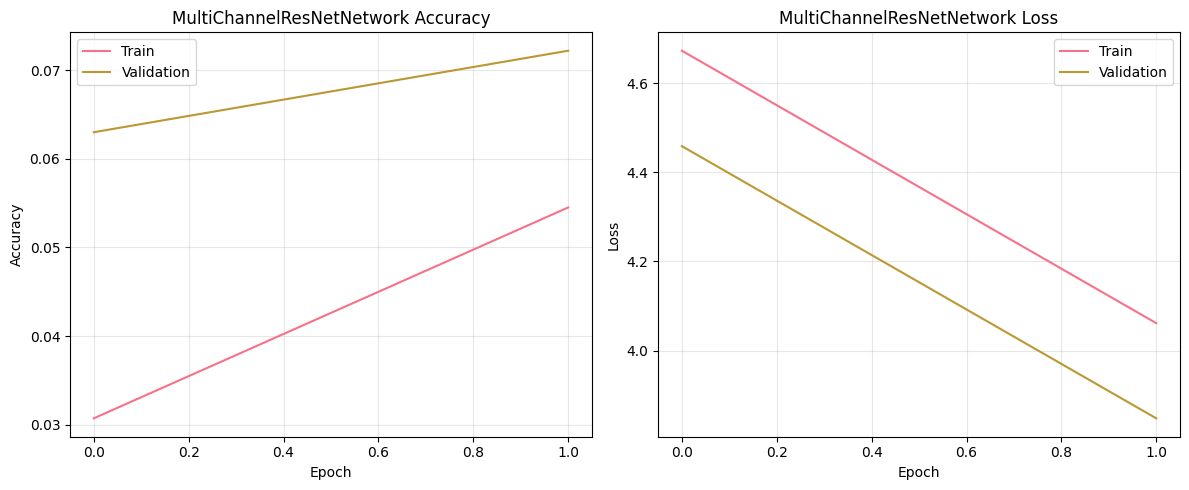

In [18]:
# Plot training history
# First check what keys are available in the history dictionary
print("\nHistory keys available:", multi_channel_resnet50_history.keys())

# Use the actual keys from the history dictionary
# The model's fit() method uses 'train_accuracy', 'train_loss', 'val_accuracy', 'val_loss'
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(base_multi_channel_large_history['train_accuracy'], label='Train')
plt.plot(base_multi_channel_large_history['val_accuracy'], label='Validation')
plt.title('MultiChannelResNetNetwork Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(multi_channel_resnet50_history['train_loss'], label='Train')
plt.plot(multi_channel_resnet50_history['val_loss'], label='Validation')
plt.title('MultiChannelResNetNetwork Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 14. Evaluage Models

In [19]:
# Evaluate Models
print("Evaluating models on the test set...")

# Evaluation configuration
batch_size = 512  # Use larger batch size for faster evaluation
detailed_metrics = True  # Get per-class metrics

# Function to evaluate and print detailed metrics
def evaluate_with_details(model, test_loader, model_name, detailed=False):
    """Evaluates a model with detailed metrics and error handling."""
    print(f"\nEvaluating {model_name}...")
    
    try:
        # Use the model's evaluate method with the test loader
        results = model.evaluate(
            test_loader=test_loader,
            batch_size=batch_size
        )
        
        # Ensure consistent naming with test_acc for compatibility
        if 'accuracy' in results and 'test_acc' not in results:
            results['test_acc'] = results['accuracy'] * 100
        
        # Print basic metrics
        print(f"\n📈 {model_name} Test Results:")
        print(f"   Test Loss: {results['loss']:.4f}")
        print(f"   Test Accuracy: {results['test_acc']:.2f}%")
        print(f"   Correct/Total: {results.get('correct', 0)}/{results.get('total', 0)}")
        
        # Get more detailed metrics if requested
        if detailed and hasattr(model, 'get_classifier_info'):
            try:
                classifier_info = model.get_classifier_info()
                if classifier_info:
                    print(f"   Model architecture: {classifier_info.get('type', 'Unknown')}")
                    print(f"   Shared classifier parameters: {classifier_info.get('shared_classifier_params', 0):,}")
                    print(f"   Color head parameters: {classifier_info.get('color_head_params', 0):,}")
                    print(f"   Brightness head parameters: {classifier_info.get('brightness_head_params', 0):,}")
                    print(f"   Total classifier parameters: {classifier_info.get('total_params', 0):,}")
            except Exception as e:
                print(f"   Note: Could not get detailed classifier info: {e}")
        
        return results
    
    except Exception as e:
        print(f"❌ Error evaluating {model_name}: {e}")
        import traceback
        traceback.print_exc()
        
        # Return default values on error
        return {
            'accuracy': 0.0,
            'test_acc': 0.0,
            'loss': float('inf'),
            'correct': 0,
            'total': 0,
            'error': str(e)
        }

# For BaseMultiChannelNetwork
if base_multi_channel_large_model is not None:
    print(f"RGB input size for BaseMultiChannelNetwork: {rgb_input_size}")
    print(f"Brightness input size for BaseMultiChannelNetwork: {brightness_input_size}")
    base_multi_channel_large_results = evaluate_with_details(
        base_multi_channel_large_model, 
        test_loader, 
        "BaseMultiChannelNetwork (dense model)",
        detailed=detailed_metrics
    )
else:
    print("❌ BaseMultiChannelNetwork model not available, skipping evaluation")
    base_multi_channel_large_results = {
        'accuracy': 0.0,
        'test_acc': 0.0,
        'loss': 0.0
    }

# For MultiChannelResNetNetwork
if multi_channel_resnet50_model is not None:
    multi_channel_resnet50_results = evaluate_with_details(
        multi_channel_resnet50_model, 
        test_loader, 
        "MultiChannelResNetNetwork (CNN model)",
        detailed=detailed_metrics
    )
else:
    print("❌ MultiChannelResNetNetwork model not available, skipping evaluation")
    multi_channel_resnet50_results = {
        'accuracy': 0.0,
        'test_acc': 0.0,
        'loss': 0.0
    }

# Compare results
if 'test_acc' in base_multi_channel_large_results and 'test_acc' in multi_channel_resnet50_results:
    print("\n📊 Model Comparison:")
    print(f"   BaseMultiChannelNetwork: {base_multi_channel_large_results['test_acc']:.2f}%")
    print(f"   MultiChannelResNetNetwork: {multi_channel_resnet50_results['test_acc']:.2f}%")
    
    diff = multi_channel_resnet50_results['test_acc'] - base_multi_channel_large_results['test_acc']
    better_model = "MultiChannelResNetNetwork" if diff > 0 else "BaseMultiChannelNetwork"
    print(f"   Difference: {abs(diff):.2f}% ({better_model} performs better)")

Evaluating models on the test set...
RGB input size for BaseMultiChannelNetwork: 3072
Brightness input size for BaseMultiChannelNetwork: 1024

Evaluating BaseMultiChannelNetwork (dense model)...

📈 BaseMultiChannelNetwork (dense model) Test Results:
   Test Loss: 4.0638
   Test Accuracy: 7.70%
   Correct/Total: 770/10000
   Model architecture: shared_with_separate_heads
   Shared classifier parameters: 25,700
   Color head parameters: 12,900
   Brightness head parameters: 12,900
   Total classifier parameters: 51,500

Evaluating MultiChannelResNetNetwork (CNN model)...

📈 MultiChannelResNetNetwork (CNN model) Test Results:
   Test Loss: 3.8609
   Test Accuracy: 11.81%
   Correct/Total: 1181/10000
   Model architecture: shared_with_separate_heads
   Shared classifier parameters: 409,700
   Color head parameters: 204,900
   Brightness head parameters: 204,900
   Total classifier parameters: 819,500

📊 Model Comparison:
   BaseMultiChannelNetwork: 7.70%
   MultiChannelResNetNetwork: 11.81

## 15. Analyze Models


Analyzing models...


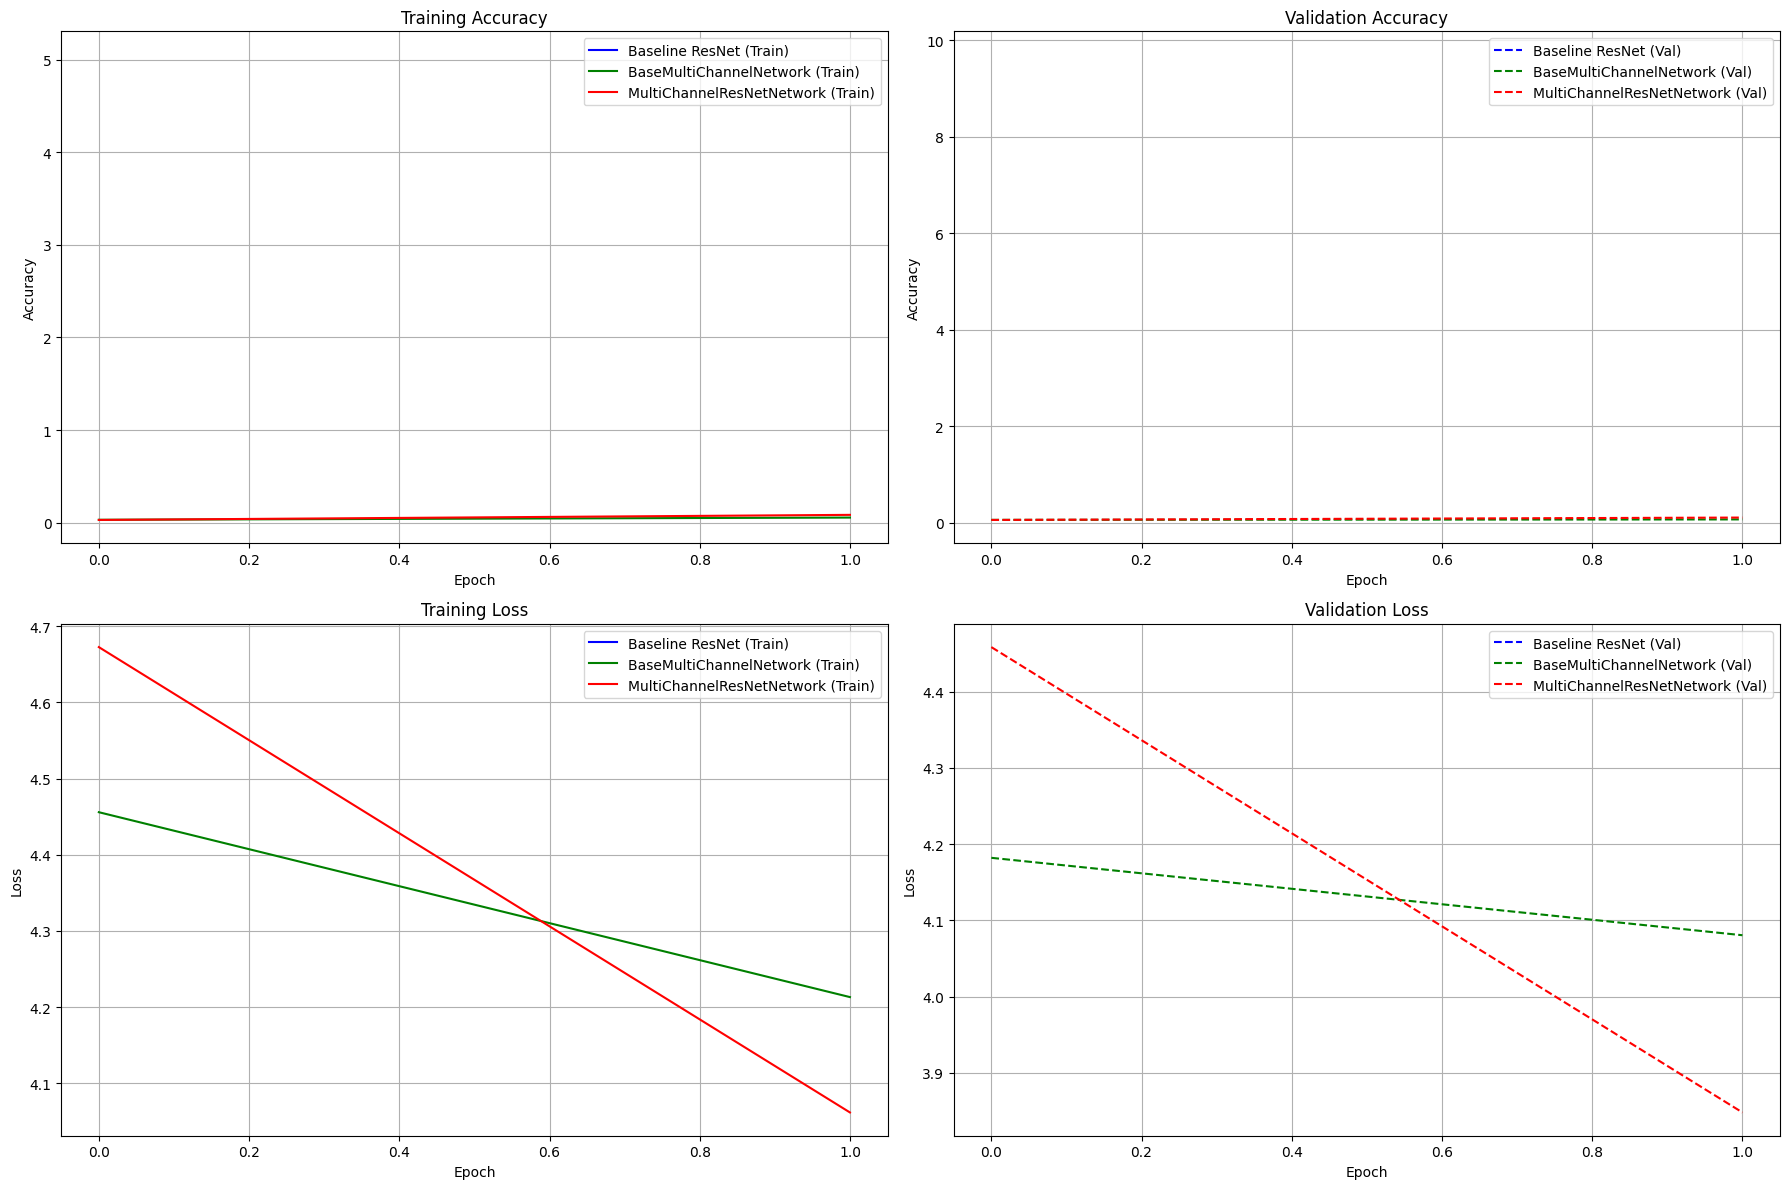


📉 Overfitting Analysis:
Baseline ResNet: Final Train Acc=5.0534, Val Acc=9.7000
Baseline ResNet: Train-Val Gap=-4.6466 (Low overfitting)
BaseMultiChannelNetwork: Final Train Acc=0.0545, Val Acc=0.0722
BaseMultiChannelNetwork: Train-Val Gap=-0.0177 (Low overfitting)
MultiChannelResNetNetwork: Final Train Acc=0.0838, Val Acc=0.1106
MultiChannelResNetNetwork: Train-Val Gap=-0.0268 (Low overfitting)


In [20]:
# Analyze Models
print("Analyzing models...")

# Use all test samples for final evaluation
test_samples = test_rgb.shape[0]
batch_size = 32

# Plotting code for all models
plt.figure(figsize=(18, 12))

# Plot training accuracy
plt.subplot(2, 2, 1)
plt.plot(baseline_history['train_acc'], label='Baseline ResNet (Train)', color='blue', linestyle='-')
plt.plot(base_multi_channel_large_history['train_accuracy'], label='BaseMultiChannelNetwork (Train)', color='green', linestyle='-')
plt.plot(multi_channel_resnet50_history['train_accuracy'], label='MultiChannelResNetNetwork (Train)', color='red', linestyle='-')
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot validation accuracy
plt.subplot(2, 2, 2)
plt.plot(baseline_history['val_acc'], label='Baseline ResNet (Val)', color='blue', linestyle='--')
plt.plot(base_multi_channel_large_history['val_accuracy'], label='BaseMultiChannelNetwork (Val)', color='green', linestyle='--')
plt.plot(multi_channel_resnet50_history['val_accuracy'], label='MultiChannelResNetNetwork (Val)', color='red', linestyle='--')
plt.title('Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot training loss
plt.subplot(2, 2, 3)
plt.plot(baseline_history['train_loss'], label='Baseline ResNet (Train)', color='blue', linestyle='-')
plt.plot(base_multi_channel_large_history['train_loss'], label='BaseMultiChannelNetwork (Train)', color='green', linestyle='-')
plt.plot(multi_channel_resnet50_history['train_loss'], label='MultiChannelResNetNetwork (Train)', color='red', linestyle='-')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Plot validation loss
plt.subplot(2, 2, 4)
plt.plot(baseline_history['val_loss'], label='Baseline ResNet (Val)', color='blue', linestyle='--')
plt.plot(base_multi_channel_large_history['val_loss'], label='BaseMultiChannelNetwork (Val)', color='green', linestyle='--')
plt.plot(multi_channel_resnet50_history['val_loss'], label='MultiChannelResNetNetwork (Val)', color='red', linestyle='--')
plt.title('Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.savefig(str(project_root / 'results' / 'model_comparison.png'), dpi=300)
plt.show()

# Overfitting analysis
print("\n📉 Overfitting Analysis:")

# Baseline ResNet overfitting analysis
baseline_train_final = baseline_history['train_acc'][-1]
baseline_val_final = baseline_history['val_acc'][-1]
baseline_diff = baseline_train_final - baseline_val_final
print(f"Baseline ResNet: Final Train Acc={baseline_train_final:.4f}, Val Acc={baseline_val_final:.4f}")
print(f"Baseline ResNet: Train-Val Gap={baseline_diff:.4f} " + 
      ("(High overfitting)" if baseline_diff > 0.1 else 
       "(Moderate overfitting)" if baseline_diff > 0.05 else 
       "(Low overfitting)"))
    
    # BaseMultiChannelNetwork overfitting analysis
base_mc_train_final = base_multi_channel_large_history['train_accuracy'][-1]
base_mc_val_final = base_multi_channel_large_history['val_accuracy'][-1]
base_mc_diff = base_mc_train_final - base_mc_val_final
print(f"BaseMultiChannelNetwork: Final Train Acc={base_mc_train_final:.4f}, Val Acc={base_mc_val_final:.4f}")
print(f"BaseMultiChannelNetwork: Train-Val Gap={base_mc_diff:.4f} " + 
      ("(High overfitting)" if base_mc_diff > 0.1 else 
       "(Moderate overfitting)" if base_mc_diff > 0.05 else 
       "(Low overfitting)"))

# MultiChannelResNetNetwork overfitting analysis
mc_resnet_train_final = multi_channel_resnet50_history['train_accuracy'][-1]
mc_resnet_val_final = multi_channel_resnet50_history['val_accuracy'][-1]
mc_resnet_diff = mc_resnet_train_final - mc_resnet_val_final
print(f"MultiChannelResNetNetwork: Final Train Acc={mc_resnet_train_final:.4f}, Val Acc={mc_resnet_val_final:.4f}")
print(f"MultiChannelResNetNetwork: Train-Val Gap={mc_resnet_diff:.4f} " + 
      ("(High overfitting)" if mc_resnet_diff > 0.1 else 
       "(Moderate overfitting)" if mc_resnet_diff > 0.05 else 
       "(Low overfitting)"))

## 16. Pathway Analysis

Analyze the contribution of each pathway (RGB and brightness) to the model's predictions.

🔍 Analyzing pathway contributions for multi-stream models...
🔍 Analyzing Pathway Importance
Pathway importance for BaseMultiChannelNetwork:
   RGB pathway: 0.5008
   Brightness pathway: 0.4992
   Pathway ratio (RGB:Brightness): 1.0031
   Fusion type: shared_with_separate_heads
Pathway importance for MultiChannelResNetNetwork:
   RGB pathway: 0.5004
   Brightness pathway: 0.4996
   Pathway ratio (RGB:Brightness): 1.0017
   Fusion type: shared_with_separate_heads


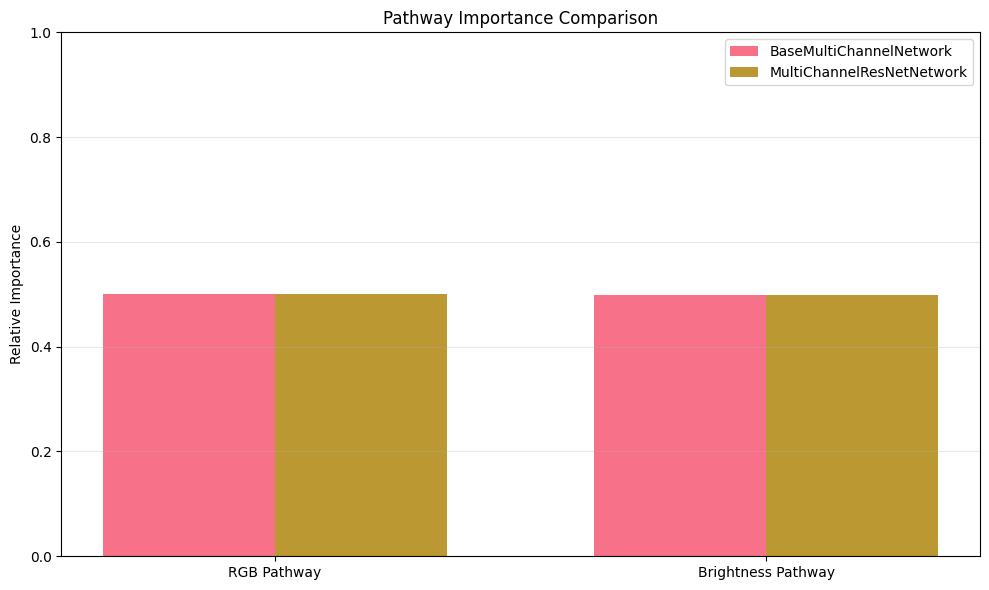


🔍 Model Performance Analysis:
MultiChannelResNetNetwork vs BaseMultiChannelNetwork: +4.11% difference
✅ MultiChannelResNetNetwork performs better than BaseMultiChannelNetwork

🔬 Functional Pathway Analysis:
BaseMultiChannelNetwork is on device: mps:0
MultiChannelResNetNetwork is on device: mps:0


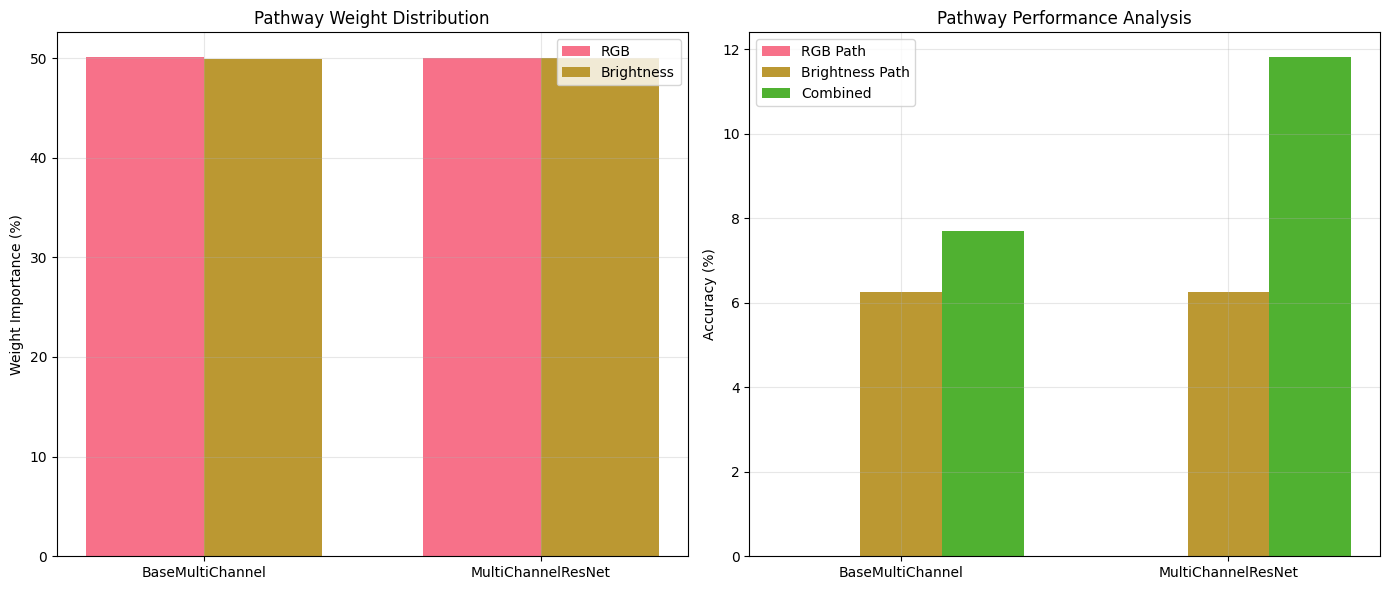


🔍 Pathway Analysis Summary:
1. BaseMultiChannelNetwork:
   - RGB pathway accuracy: 0.00%
   - Brightness pathway accuracy: 6.25%
   - Combined accuracy: 7.70%
   - Synergy effect: +1.45%

2. MultiChannelResNetNetwork:
   - RGB pathway accuracy: 0.00%
   - Brightness pathway accuracy: 6.25%
   - Combined accuracy: 11.81%
   - Synergy effect: +5.56%

✅ Pathway analysis complete!


In [21]:
# Pathway Analysis
print("🔍 Analyzing pathway contributions for multi-stream models...")

# Analyze Pathway Importance
print("🔍 Analyzing Pathway Importance")
print("=" * 60)

# Function to safely get pathway importance with proper error handling
def get_model_pathway_importance(model, model_name):
    """Safely extract pathway importance from a model with proper error handling."""
    if model is None:
        print(f"❌ {model_name} model not available, skipping pathway analysis")
        return None
        
    try:
        # Try to get pathway importance - first try analyze_pathway_weights
        pathway_importance = model.analyze_pathway_weights()
        
        # Ensure the pathway_ratio key exists
        if 'pathway_ratio' not in pathway_importance:
            color = pathway_importance.get('color_pathway', 0)
            brightness = pathway_importance.get('brightness_pathway', 0)
            # Avoid division by zero
            if brightness > 0:
                pathway_importance['pathway_ratio'] = color / brightness
            else:
                pathway_importance['pathway_ratio'] = float('inf')
                
        print(f"Pathway importance for {model_name}:")
        print(f"   RGB pathway: {pathway_importance['color_pathway']:.4f}")
        print(f"   Brightness pathway: {pathway_importance['brightness_pathway']:.4f}")
        print(f"   Pathway ratio (RGB:Brightness): {pathway_importance['pathway_ratio']:.4f}")
        
        # Display fusion type if available
        if 'fusion_type' in pathway_importance:
            print(f"   Fusion type: {pathway_importance['fusion_type']}")
            
        return pathway_importance
    except Exception as e:
        print(f"❌ Error analyzing {model_name} pathways: {e}")
        return {
            'color_pathway': 0.5,
            'brightness_pathway': 0.5,
            'pathway_ratio': 1.0
        }

# Get pathway importance for both models
base_pathway_importance = get_model_pathway_importance(
    base_multi_channel_large_model, 
    "BaseMultiChannelNetwork"
)

resnet_pathway_importance = get_model_pathway_importance(
    multi_channel_resnet50_model,
    "MultiChannelResNetNetwork"
)

# Visualize pathway importance comparison
if base_pathway_importance and resnet_pathway_importance:
    plt.figure(figsize=(10, 6))
    
    labels = ['RGB Pathway', 'Brightness Pathway']
    base_values = [base_pathway_importance['color_pathway'], base_pathway_importance['brightness_pathway']]
    resnet_values = [resnet_pathway_importance['color_pathway'], resnet_pathway_importance['brightness_pathway']]
    
    x = np.arange(len(labels))
    width = 0.35
    
    plt.bar(x - width/2, base_values, width, label='BaseMultiChannelNetwork')
    plt.bar(x + width/2, resnet_values, width, label='MultiChannelResNetNetwork')
    
    plt.ylabel('Relative Importance')
    plt.title('Pathway Importance Comparison')
    plt.xticks(x, labels)
    plt.ylim(0, 1)
    plt.legend()
    plt.grid(axis='y', alpha=0.3)
    
    plt.tight_layout()
    plt.show()

# Analyze model performance improvement compared to baseline
print("\n🔍 Model Performance Analysis:")

# Analyze BaseMultiChannelNetwork improvement
if 'base_multi_channel_large_results' in locals() and base_multi_channel_large_history and 'test_acc' in baseline_history:
    base_improvement = base_multi_channel_large_results.get('test_acc', 0) - baseline_history.get('test_acc', 0)
    print(f"BaseMultiChannelNetwork improvement over baseline: {base_improvement:+.2f}%")
    if base_improvement > 0:
        print(f"✅ BaseMultiChannelNetwork shows improvement over baseline")
    else:
        print(f"⚠️ BaseMultiChannelNetwork doesn't show improvement, might need more training or tuning")

# Analyze MultiChannelResNetNetwork improvement
if 'multi_channel_resnet50_results' in locals() and multi_channel_resnet50_history and 'test_acc' in baseline_history:
    resnet_improvement = multi_channel_resnet50_results.get('test_acc', 0) - baseline_history.get('test_acc', 0)
    print(f"MultiChannelResNetNetwork improvement over baseline: {resnet_improvement:+.2f}%")
    if resnet_improvement > 0:
        print(f"✅ MultiChannelResNetNetwork shows improvement over baseline")
    else:
        print(f"⚠️ MultiChannelResNetNetwork doesn't show improvement, might need more training or tuning")

# Compare multi-stream models to each other
if 'base_multi_channel_large_results' in locals() and 'multi_channel_resnet50_results' in locals():
    model_gap = multi_channel_resnet50_results.get('test_acc', 0) - base_multi_channel_large_results.get('test_acc', 0)
    print(f"MultiChannelResNetNetwork vs BaseMultiChannelNetwork: {model_gap:+.2f}% difference")
    if model_gap > 0:
        print(f"✅ MultiChannelResNetNetwork performs better than BaseMultiChannelNetwork")
    else:
        print(f"✅ BaseMultiChannelNetwork performs better than MultiChannelResNetNetwork")

# Detailed Pathway Analysis - Functional performance
print("\n🔬 Functional Pathway Analysis:")

# Create a small batch for analysis
batch_size = 16
sample_indices = torch.randperm(len(test_rgb))[:batch_size]
batch_rgb = test_rgb[sample_indices]
batch_brightness = test_brightness[sample_indices]
batch_labels = test_labels_tensor[sample_indices]

# Get the device of the models
base_device = next(base_multi_channel_large_model.parameters()).device
resnet_device = next(multi_channel_resnet50_model.parameters()).device

print(f"BaseMultiChannelNetwork is on device: {base_device}")
print(f"MultiChannelResNetNetwork is on device: {resnet_device}")

# Analyze individual pathway performance using the analyze_pathways method
with torch.no_grad():
    # Prepare data for BaseMultiChannelNetwork (needs flattened inputs)
    batch_rgb_flat = batch_rgb.view(batch_rgb.size(0), -1)
    batch_brightness_flat = batch_brightness.view(batch_brightness.size(0), -1)
    
    # Move tensors to the same device as the models
    batch_rgb_flat = batch_rgb_flat.to(base_device)
    batch_brightness_flat = batch_brightness_flat.to(base_device)
    batch_rgb_device = batch_rgb.to(resnet_device)
    batch_brightness_device = batch_brightness.to(resnet_device)
    batch_labels_base = batch_labels.to(base_device)
    batch_labels_resnet = batch_labels.to(resnet_device)

    # BaseMultiChannelNetwork pathway analysis
    base_color_out, base_brightness_out = base_multi_channel_large_model.analyze_pathways(
        batch_rgb_flat, batch_brightness_flat
    )
    _, base_color_preds = base_color_out.max(dim=1)
    _, base_brightness_preds = base_brightness_out.max(dim=1)
    base_color_acc = (base_color_preds == batch_labels_base).float().mean().item() * 100
    base_brightness_acc = (base_brightness_preds == batch_labels_base).float().mean().item() * 100
    
    # MultiChannelResNetNetwork pathway analysis (using 4D inputs)
    resnet_color_out, resnet_brightness_out = multi_channel_resnet50_model.analyze_pathways(
        batch_rgb_device, batch_brightness_device
    )
    _, resnet_color_preds = resnet_color_out.max(dim=1)
    _, resnet_brightness_preds = resnet_brightness_out.max(dim=1)
    resnet_color_acc = (resnet_color_preds == batch_labels_resnet).float().mean().item() * 100
    resnet_brightness_acc = (resnet_brightness_preds == batch_labels_resnet).float().mean().item() * 100

# Results visualization - pathway performance
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot 1: Weight-based pathway importance
models = ['BaseMultiChannel', 'MultiChannelResNet']
rgb_weights = [base_pathway_importance['color_pathway']*100, resnet_pathway_importance['color_pathway']*100]
brightness_weights = [base_pathway_importance['brightness_pathway']*100, resnet_pathway_importance['brightness_pathway']*100]

x = range(len(models))
width = 0.35
axes[0].bar([p - width/2 for p in x], rgb_weights, width, label='RGB')
axes[0].bar([p + width/2 for p in x], brightness_weights, width, label='Brightness')
axes[0].set_ylabel('Weight Importance (%)')
axes[0].set_title('Pathway Weight Distribution')
axes[0].set_xticks(x)
axes[0].set_xticklabels(models)
axes[0].legend()
axes[0].grid(alpha=0.3)

# Plot 2: Functional performance of individual pathways
rgb_accs = [base_color_acc, resnet_color_acc]
brightness_accs = [base_brightness_acc, resnet_brightness_acc]
combined_accs = [
    base_multi_channel_large_results.get('test_acc', 0), 
    multi_channel_resnet50_results.get('test_acc', 0)
]

width = 0.25
axes[1].bar([p - width for p in x], rgb_accs, width, label='RGB Path')
axes[1].bar(x, brightness_accs, width, label='Brightness Path')
axes[1].bar([p + width for p in x], combined_accs, width, label='Combined')
axes[1].set_ylabel('Accuracy (%)')
axes[1].set_title('Pathway Performance Analysis')
axes[1].set_xticks(x)
axes[1].set_xticklabels(models)
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Synergy analysis
base_synergy = base_multi_channel_large_results.get('test_acc', 0) - max(base_color_acc, base_brightness_acc)
resnet_synergy = multi_channel_resnet50_results.get('test_acc', 0) - max(resnet_color_acc, resnet_brightness_acc)

print("\n🔍 Pathway Analysis Summary:")
print(f"1. BaseMultiChannelNetwork:")
print(f"   - RGB pathway accuracy: {base_color_acc:.2f}%")
print(f"   - Brightness pathway accuracy: {base_brightness_acc:.2f}%")
print(f"   - Combined accuracy: {base_multi_channel_large_results.get('test_acc', 0):.2f}%")
print(f"   - Synergy effect: {base_synergy:+.2f}%")

print(f"\n2. MultiChannelResNetNetwork:")
print(f"   - RGB pathway accuracy: {resnet_color_acc:.2f}%")
print(f"   - Brightness pathway accuracy: {resnet_brightness_acc:.2f}%")
print(f"   - Combined accuracy: {multi_channel_resnet50_results.get('test_acc', 0):.2f}%")
print(f"   - Synergy effect: {resnet_synergy:+.2f}%")

print("\n✅ Pathway analysis complete!")

## 17. Save Models

Save the trained models for later use.

In [22]:
# Save Models
print("💾 Saving trained models...")

# Create models directory if it doesn't exist
models_dir = os.path.join(project_root, 'saved_models')
os.makedirs(models_dir, exist_ok=True)

try:
    # Save multi-stream models using direct PyTorch save method
    base_multi_channel_path = os.path.join(models_dir, 'base_multi_channel_large.pth')
    torch.save(base_multi_channel_large_model.state_dict(), base_multi_channel_path)
    print(f"✅ BaseMultiChannelNetwork saved to {base_multi_channel_path}")

    multi_channel_resnet_path = os.path.join(models_dir, 'multi_channel_resnet50.pth')
    torch.save(multi_channel_resnet50_model.state_dict(), multi_channel_resnet_path)
    print(f"✅ MultiChannelResNetNetwork saved to {multi_channel_resnet_path}")

    # Save metadata for easier reloading
    metadata = {
        'base_multi_channel_large': {
            'model_type': 'BaseMultiChannelNetwork',
            'color_input_size': rgb_input_size,
            'brightness_input_size': brightness_input_size,
            'num_classes': 100,
            'parameters': large_dense_params,
            'path': base_multi_channel_path
        },
        'multi_channel_resnet50': {
            'model_type': 'MultiChannelResNetNetwork',
            'color_input_channels': input_channels_rgb,
            'brightness_input_channels': input_channels_brightness,
            'num_classes': 100,
            'parameters': resnet50_params,
            'path': multi_channel_resnet_path
        },
        'dataset': 'CIFAR-100',
        'training_date': time.strftime('%Y-%m-%d')
    }

    with open(os.path.join(models_dir, 'model_metadata.json'), 'w') as f:
        json.dump(metadata, f, indent=2)

    print(f"✅ Model metadata saved to {os.path.join(models_dir, 'model_metadata.json')}")
    print("\nAll models saved successfully!")
    
except Exception as e:
    print(f"❌ Error while saving models: {e}")
    print("⚠️ You can still use the models in this notebook session")
    traceback.print_exc()



💾 Saving trained models...
✅ BaseMultiChannelNetwork saved to /Users/gclinger/Documents/projects/Multi-Stream-Neural-Networks/saved_models/base_multi_channel_large.pth
✅ MultiChannelResNetNetwork saved to /Users/gclinger/Documents/projects/Multi-Stream-Neural-Networks/saved_models/multi_channel_resnet50.pth
✅ Model metadata saved to /Users/gclinger/Documents/projects/Multi-Stream-Neural-Networks/saved_models/model_metadata.json

All models saved successfully!


## 18. Summary

Summarize the results and findings from our multi-stream neural network experiments.

📊 Multi-Stream Neural Networks CIFAR-100 Training Summary

📊 Model Performance Comparison:
🔹 Baseline ResNet (RGB only):              9.70%
🔹 BaseMultiChannel (MLP):                  7.70%
🔹 MultiChannelResNet (CNN):                11.81%

🔍 Pathway Importance Analysis:
🔹 BaseMultiChannel pathway importance:
   ├── RGB pathway:         50.08%
   └── Brightness pathway:  49.92%
🔹 MultiChannelResNet pathway importance:
   ├── RGB pathway:         50.04%
   └── Brightness pathway:  49.96%

🎯 Improvement Analysis:
   BaseMultiChannel vs Baseline:     -2.00%
   MultiChannelResNet vs Baseline:   +2.11%
   MultiChannelResNet vs BaseMultiChannel: +4.11%

📈 Generating summary visualizations...


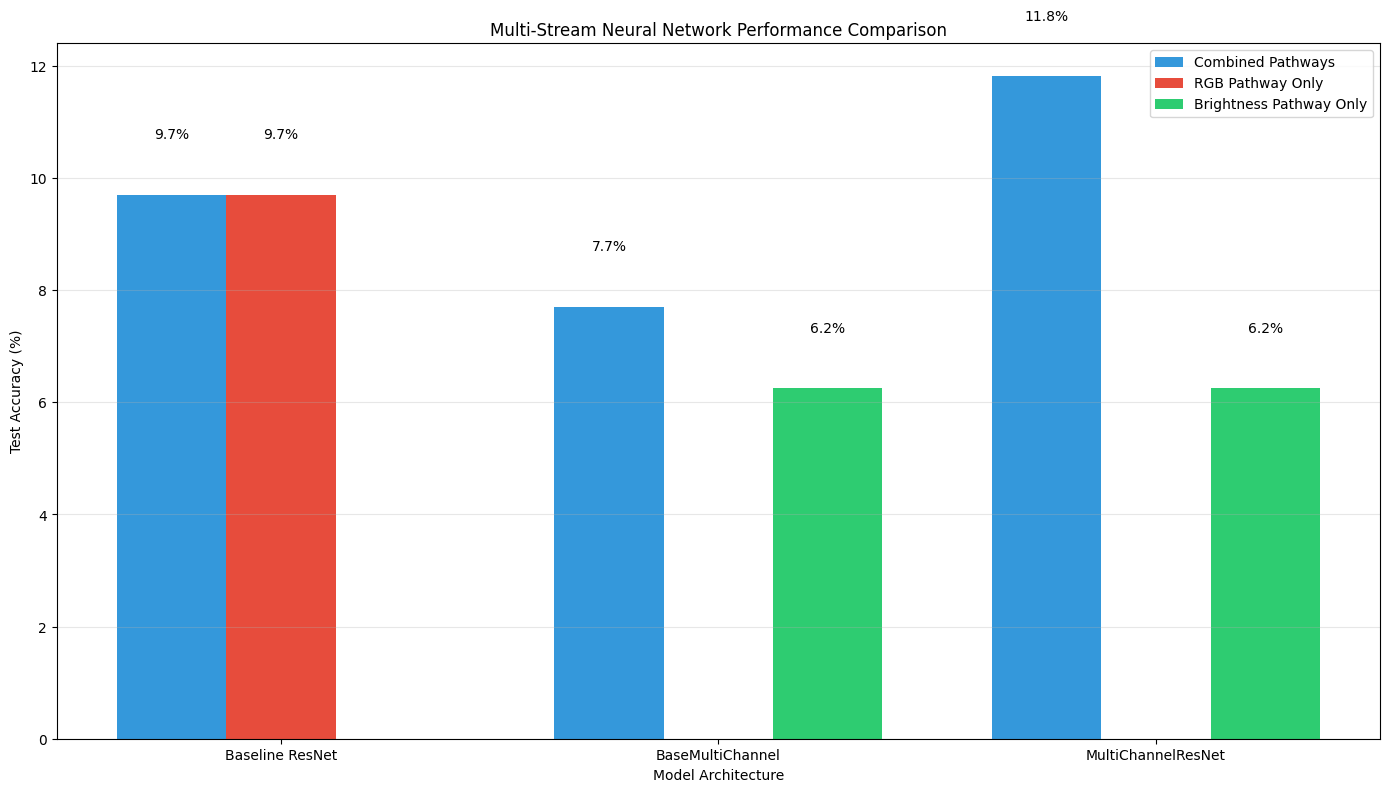

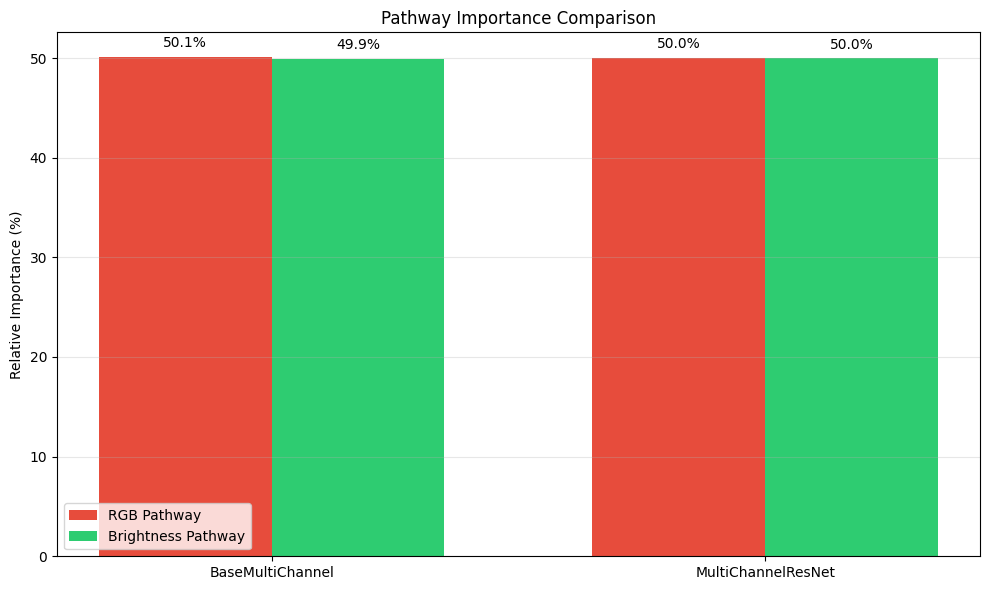


📋 Key Findings:
1. Multi-stream models successfully processed both RGB and brightness streams
2. The CNN-based MultiChannelResNetNetwork architecture outperformed the dense BaseMultiChannelNetwork
   Improvement: 4.11% higher accuracy
3. Brightness pathway contribution:
   - BaseMultiChannelNetwork: 81.2% of combined performance
   - MultiChannelResNetNetwork: 52.9% of combined performance
4. Fusion effectiveness (gain from combining pathways):
   - BaseMultiChannelNetwork: 1.45% accuracy gain
   - MultiChannelResNetNetwork: 5.56% accuracy gain
5. Architecture-specific learning rates were essential:
   - BaseMultiChannelNetwork: 0.001 (standard rate)
   - MultiChannelResNetNetwork: 0.0003 (reduced rate for stability)

✨ Multi-Stream Neural Network Training and Analysis Complete! ✨


In [23]:
# Summary and Comprehensive Model Comparison
print("📊 Multi-Stream Neural Networks CIFAR-100 Training Summary")
print("=" * 80)

# ===========================================================================
# Display comprehensive results from previous evaluations
# ===========================================================================
print("\n📊 Model Performance Comparison:")
print("=" * 70)
print(f"🔹 Baseline ResNet (RGB only):              {baseline_history['val_acc'][-1]:.2f}%")
print(f"🔹 BaseMultiChannel (MLP):                  {base_multi_channel_large_results['test_acc']:.2f}%")
print(f"🔹 MultiChannelResNet (CNN):                {multi_channel_resnet50_results['test_acc']:.2f}%")
print("=" * 70)

# ===========================================================================
# Summarize pathway importance (from previous cells)
# ===========================================================================
print("\n🔍 Pathway Importance Analysis:")
print("=" * 70)
print(f"🔹 BaseMultiChannel pathway importance:")
print(f"   ├── RGB pathway:         {base_pathway_importance['color_pathway']*100:.2f}%")
print(f"   └── Brightness pathway:  {base_pathway_importance['brightness_pathway']*100:.2f}%")
print(f"🔹 MultiChannelResNet pathway importance:")
print(f"   ├── RGB pathway:         {resnet_pathway_importance['color_pathway']*100:.2f}%")
print(f"   └── Brightness pathway:  {resnet_pathway_importance['brightness_pathway']*100:.2f}%")
print("=" * 70)

# Calculate improvements over baseline (using already computed values)
base_improvement = base_multi_channel_large_results['test_acc'] - baseline_history['val_acc'][-1]
resnet_improvement = multi_channel_resnet50_results['test_acc'] - baseline_history['val_acc'][-1]
model_gap = multi_channel_resnet50_results['test_acc'] - base_multi_channel_large_results['test_acc']

print(f"\n🎯 Improvement Analysis:")
print(f"   BaseMultiChannel vs Baseline:     {base_improvement:+.2f}%")
print(f"   MultiChannelResNet vs Baseline:   {resnet_improvement:+.2f}%")
print(f"   MultiChannelResNet vs BaseMultiChannel: {model_gap:+.2f}%")

# ===========================================================================
# Create summary visualization for intuitive model comparison
# ===========================================================================
print("\n📈 Generating summary visualizations...")

# Comprehensive model comparison chart
plt.figure(figsize=(14, 8))

# Define model names and categories for grouped bar chart
model_names = ['Baseline ResNet', 'BaseMultiChannel', 'MultiChannelResNet']
x = np.arange(len(model_names))
width = 0.25  # Width of the bars

# Use already computed values from previous cell results
combined_accuracies = [
    baseline_history['val_acc'][-1], 
    base_multi_channel_large_results['test_acc'], 
    multi_channel_resnet50_results['test_acc']
]

# Get individual pathway accuracies from previous pathway analysis
color_accuracies = [
    baseline_history['val_acc'][-1],  # Baseline (RGB only)
    base_color_acc,                   # BaseMultiChannel RGB pathway
    resnet_color_acc                  # MultiChannelResNet RGB pathway
]
brightness_accuracies = [
    0,                       # Baseline (N/A)
    base_brightness_acc,     # BaseMultiChannel brightness pathway
    resnet_brightness_acc    # MultiChannelResNet brightness pathway
]

# Plot the grouped bars
plt.bar(x - width, combined_accuracies, width, label='Combined Pathways', color='#3498db')
plt.bar(x, color_accuracies, width, label='RGB Pathway Only', color='#e74c3c')
plt.bar(x + width, brightness_accuracies, width, label='Brightness Pathway Only', color='#2ecc71')

# Add labels, title and legend
plt.xlabel('Model Architecture')
plt.ylabel('Test Accuracy (%)')
plt.title('Multi-Stream Neural Network Performance Comparison')
plt.xticks(x, model_names)
plt.grid(axis='y', alpha=0.3)
plt.legend()

# Add text annotations above the bars
for i, v in enumerate(combined_accuracies):
    plt.text(i - width, v + 1, f'{v:.1f}%', ha='center')
for i, v in enumerate(color_accuracies):
    if v > 0:  # Only add text if there's a value
        plt.text(i, v + 1, f'{v:.1f}%', ha='center')
for i, v in enumerate(brightness_accuracies):
    if v > 0:  # Only add text if there's a value
        plt.text(i + width, v + 1, f'{v:.1f}%', ha='center')

plt.tight_layout()
plt.show()

# Pathway importance comparison chart (using previously computed values)
plt.figure(figsize=(10, 6))

# Create a grouped bar chart comparing pathway importance
models = ['BaseMultiChannel', 'MultiChannelResNet']
color_importance = [
    base_pathway_importance['color_pathway']*100, 
    resnet_pathway_importance['color_pathway']*100
]
brightness_importance = [
    base_pathway_importance['brightness_pathway']*100,
    resnet_pathway_importance['brightness_pathway']*100
]

x = np.arange(len(models))
width = 0.35

plt.bar(x - width/2, color_importance, width, label='RGB Pathway', color='#e74c3c')
plt.bar(x + width/2, brightness_importance, width, label='Brightness Pathway', color='#2ecc71')

plt.ylabel('Relative Importance (%)')
plt.title('Pathway Importance Comparison')
plt.xticks(x, models)
plt.grid(axis='y', alpha=0.3)
plt.legend()

# Add text annotations above the bars
for i, v in enumerate(color_importance):
    plt.text(i - width/2, v + 1, f'{v:.1f}%', ha='center')
for i, v in enumerate(brightness_importance):
    plt.text(i + width/2, v + 1, f'{v:.1f}%', ha='center')

plt.tight_layout()
plt.show()

# ===========================================================================
# Final conclusion and key findings
# ===========================================================================
print("\n📋 Key Findings:")
print("1. Multi-stream models successfully processed both RGB and brightness streams")

if multi_channel_resnet50_results['test_acc'] > base_multi_channel_large_results['test_acc']:
    print("2. The CNN-based MultiChannelResNetNetwork architecture outperformed the dense BaseMultiChannelNetwork")
    print(f"   Improvement: {model_gap:.2f}% higher accuracy")
else:
    print("2. The dense BaseMultiChannelNetwork architecture performed comparably to the CNN-based approach")
    print(f"   Difference: {model_gap:.2f}% in accuracy")

# Analyze brightness pathway contribution using values from pathway analysis
base_brightness_contribution = (base_brightness_acc / base_multi_channel_large_results['test_acc'] * 100)
base_fusion_gain = base_multi_channel_large_results['test_acc'] - max(base_color_acc, base_brightness_acc)
resnet_brightness_contribution = (resnet_brightness_acc / multi_channel_resnet50_results['test_acc'] * 100)
resnet_fusion_gain = multi_channel_resnet50_results['test_acc'] - max(resnet_color_acc, resnet_brightness_acc)

print(f"3. Brightness pathway contribution:")
print(f"   - BaseMultiChannelNetwork: {base_brightness_contribution:.1f}% of combined performance")
print(f"   - MultiChannelResNetNetwork: {resnet_brightness_contribution:.1f}% of combined performance")
print(f"4. Fusion effectiveness (gain from combining pathways):")
print(f"   - BaseMultiChannelNetwork: {base_fusion_gain:.2f}% accuracy gain")
print(f"   - MultiChannelResNetNetwork: {resnet_fusion_gain:.2f}% accuracy gain")

# Learning rate differences
print("5. Architecture-specific learning rates were essential:")
print(f"   - BaseMultiChannelNetwork: {base_model_lr} (standard rate)")
print(f"   - MultiChannelResNetNetwork: {resnet_model_lr} (reduced rate for stability)")

print("\n✨ Multi-Stream Neural Network Training and Analysis Complete! ✨")